# Dependencies

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('cleaned_hotel_bookings_data.csv')

In [ ]:
df2 = df.copy()

df2['total_stay_duration'] = df2['stays_in_weekend_nights'] + df2['stays_in_weekdays_nights']

df2.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
29107,Resort Hotel,0,0,2019,June,17,28,0,1,2,...,No Deposit,240,0,0,Personal,115.00,1,1,Check-Out,1
27686,Resort Hotel,0,5,2019,May,10,7,0,2,1,...,No Deposit,241,0,0,Personal,56.00,0,1,Check-Out,2
53581,City Hotel,1,88,2017,February,53,30,0,3,2,...,No Deposit,9,0,0,Personal,97.35,0,2,Canceled,3
69970,City Hotel,0,8,2018,December,44,29,2,1,2,...,No Deposit,9,0,0,Personal,135.67,0,2,Check-Out,3
40334,City Hotel,1,76,2018,September,28,6,0,4,2,...,No Deposit,52,0,0,Personal,72.25,0,0,Canceled,4


In [ ]:
def week_group(row):
        if row < 14:
            return row
        if row >= 14:
            return 14
    
df2['duration_group'] = df2['total_stay_duration'].apply(week_group)

df2.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration,duration_group
58538,City Hotel,0,60,2018,June,14,1,1,2,2,...,9,0,0,Personal,106.20,0,1,Check-Out,3,3
46027,City Hotel,1,165,2019,May,9,4,2,2,3,...,9,0,0,Personal,119.00,0,1,Canceled,4,4
55477,City Hotel,0,20,2018,March,2,4,1,2,1,...,91,0,0,Personal,6.00,0,0,Check-Out,3,3
78303,City Hotel,0,287,2019,June,17,28,2,2,2,...,9,0,0,Personal,112.85,0,0,Check-Out,4,4
9962,Resort Hotel,1,269,2019,October,32,12,2,5,2,...,15,0,0,Personal,162.00,0,0,Canceled,7,7


In [ ]:
df2 = df2.groupby(['hotel', 'duration_group']).agg({
        "is_canceled": ["sum", "count"]
    })

df2 = df2.reset_index() 
df2.columns = ['hotel_type', 'duration_group', 'total_cancellation', 'total_booking']

df2.sample(5)

,hotel_type,duration_group,total_cancellation,total_booking
21,Resort Hotel,6,510,1617
3,City Hotel,3,4185,13321
1,City Hotel,1,2259,10100
22,Resort Hotel,7,1593,5627
15,Resort Hotel,0,6,6


In [ ]:
df2['cancellation_rate'] = df2['total_cancellation'] * 100 / df2['total_booking']
df2['cancellation_rate'] = df2['cancellation_rate'].round(2)

#masih terdapat data yang tidak sesuai sehingga perlu didrop
df2.drop(df2[df2.duration_group==0].index, inplace=True)

df2.sample(5)

,hotel_type,duration_group,total_cancellation,total_booking,cancellation_rate
2,City Hotel,2,3135,10509,29.83
9,City Hotel,9,87,198,43.94
19,Resort Hotel,4,1044,3883,26.89
4,City Hotel,4,3059,9499,32.20
11,City Hotel,11,45,76,59.21


In [ ]:
city = df2[df2['hotel_type'] == 'City Hotel']
resort = df2[df2['hotel_type'] == 'Resort Hotel']

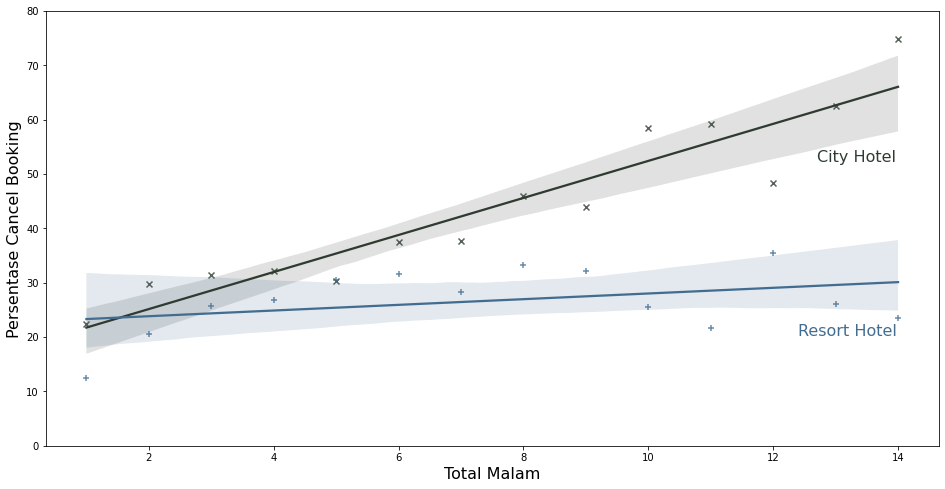

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.regplot(data=city, x='duration_group', y='cancellation_rate', marker="x", ax=ax, color='#2F3B30')
sns.regplot(data=resort, x='duration_group', y='cancellation_rate', marker='+', ax=ax, color='#436D90')

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.text(
    x=12.7, 
    y=53, 
    s='City Hotel', 
    fontsize=16,
    va='center', 
    ha='left',
    color='#2F3B30' 
)

ax.text(
    x=12.4, 
    y=21, 
    s='Resort Hotel', 
    fontsize=16,
    va='center', 
    ha='left',
    color='#436D90'
)

plt.ylabel('Persentase Cancel Booking', fontsize=16)
plt.xlabel('Total Malam', fontsize=16)
plt.ylim([0, 80])
plt.grid(False)
plt.show()